In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [3]:
california_housing = fetch_california_housing()
data = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
data['PRICE'] = california_housing.target

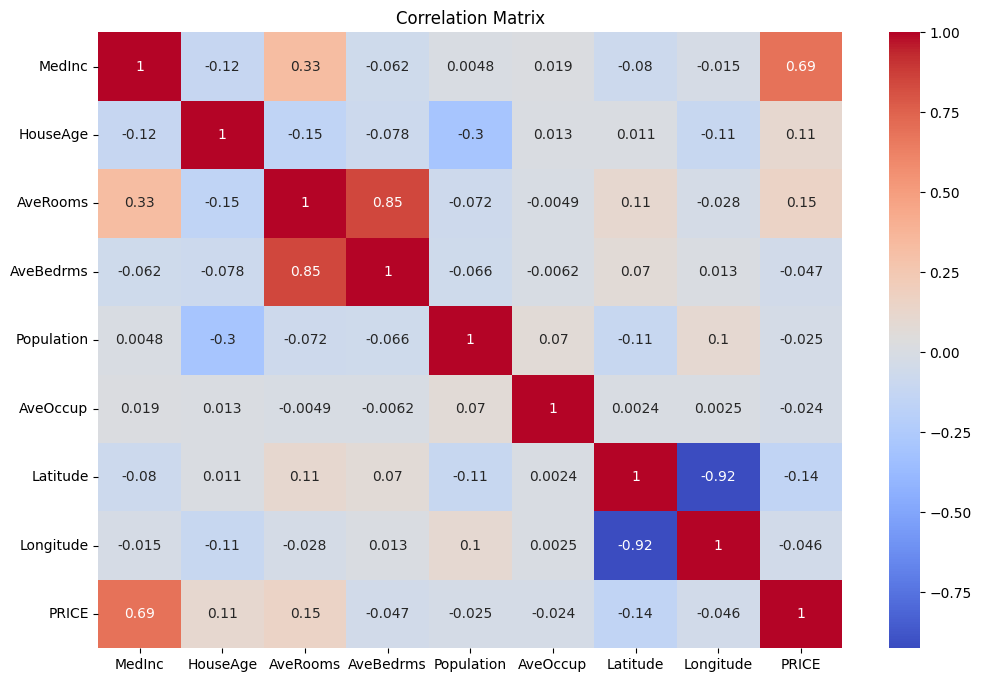

In [4]:
# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

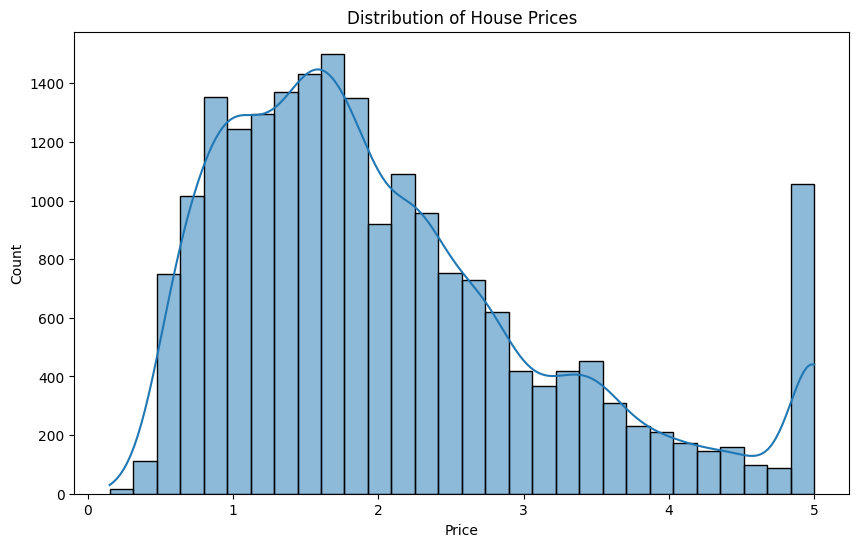

In [5]:
# Visualize the distribution of the target variable (Price)
plt.figure(figsize=(10, 6))
sns.histplot(data['PRICE'], bins=30, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.show()

In [6]:
# Split the data into features (X) and target variable (y)
X = data.drop('PRICE', axis=1)
y = data['PRICE']

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# Train a linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_linear = linear_model.predict(X_test_scaled)

# Evaluate the linear regression model
mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f'Mean Squared Error (Linear Regression): {mse_linear}')

Mean Squared Error (Linear Regression): 0.5558915986952442


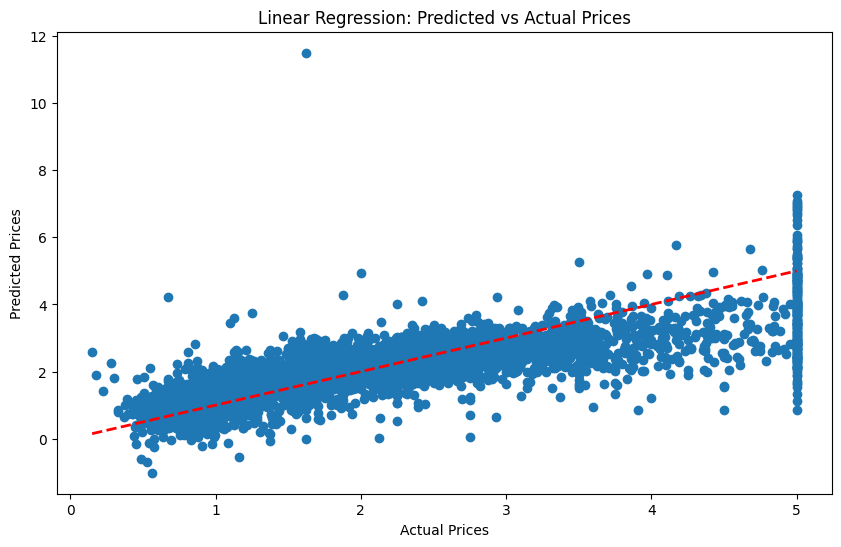

In [10]:
# Visualize the predicted vs actual prices for linear regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('Linear Regression: Predicted vs Actual Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

In [11]:
# Train a neural network model using TensorFlow
model = Sequential()
model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

In [12]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0)

# Make predictions on the test set using the neural network
y_pred_nn = model.predict(X_test_scaled).flatten()

# Evaluate the neural network model
mse_nn = mean_squared_error(y_test, y_pred_nn)
print(f'Mean Squared Error (Neural Network): {mse_nn}')

129/129 [==============================] - 0s 1ms/step
Mean Squared Error (Neural Network): 0.2583953508105709


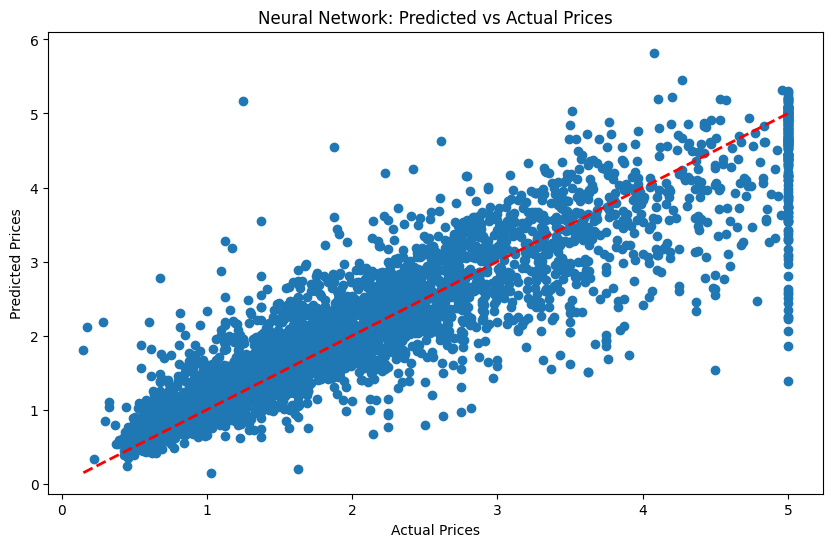

In [13]:
# Visualize the predicted vs actual prices for the neural network
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_nn)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('Neural Network: Predicted vs Actual Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()